In [66]:
#Import libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [45]:
# Load datasets
train_df = pd.read_csv('churn-bigml-80.csv')
test_df = pd.read_csv('churn-bigml-20.csv')

In [48]:
# Inspect first rows
print(train_df.head())
print(test_df.head())

  State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47   

In [49]:
# Separate features and target
X_train = train_df.drop('Churn', axis=1)
y_train = train_df['Churn']

In [50]:
X_test = test_df.drop('Churn', axis=1)
y_test = test_df['Churn']

In [51]:
# Check for missing values
print("Missing values in X_train:\n", X_train.isnull().sum())
print("Missing values in X_test:\n", X_test.isnull().sum())
print("Missing values in y_train:\n", y_train.isnull().sum())
print("Missing values in y_test:\n", y_test.isnull().sum())

Missing values in X_train:
 State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
dtype: int64
Missing values in X_test:
 State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total ni

In [52]:
# Encode categorical variables 

X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

In [53]:
# Align test columns with training set
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


In [67]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE :", pd.Series(y_train_res).value_counts())

Before SMOTE: False    2278
True      388
Name: Churn, dtype: int64
After SMOTE : False    2278
True     2278
Name: Churn, dtype: int64


In [89]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [90]:
# Train Logistic Regression
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)


LogisticRegression(random_state=42)

In [91]:
# making a Prediction
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:,1]

In [92]:
y_pred


array([False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [93]:
y_prob

array([0.14236017, 0.1513608 , 0.73728348, 0.05943705, 0.01231518,
       0.00528469, 0.32247986, 0.26341017, 0.03375558, 0.06447354,
       0.15623822, 0.02249303, 0.16378925, 0.00685881, 0.04579645,
       0.10082761, 0.14507087, 0.07065682, 0.02542411, 0.1804807 ,
       0.01608281, 0.00867401, 0.12527284, 0.06375103, 0.13696504,
       0.05385491, 0.02020811, 0.04084623, 0.08184855, 0.02787744,
       0.05242701, 0.07345192, 0.03607852, 0.34164989, 0.18693085,
       0.64312682, 0.07570366, 0.05248321, 0.10248588, 0.0529144 ,
       0.03101385, 0.46124961, 0.00407548, 0.22640567, 0.0400816 ,
       0.02313895, 0.10215014, 0.1842887 , 0.31646316, 0.11138349,
       0.00226393, 0.36809424, 0.0495789 , 0.25723801, 0.16661179,
       0.03967632, 0.29874001, 0.10551103, 0.20057016, 0.09500117,
       0.19951772, 0.032391  , 0.58380689, 0.00559386, 0.20431852,
       0.90573654, 0.77971051, 0.0186435 , 0.33269034, 0.05682782,
       0.01002486, 0.09998927, 0.03105702, 0.06183967, 0.10908

In [94]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    roc_curve
)

In [95]:
# Evaluating the model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

In [96]:
print("\nModel Evaluation Metrics:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"ROC AUC  : {roc_auc:.4f}")


Model Evaluation Metrics:
Accuracy : 0.8591
Precision: 0.5106
Recall   : 0.2526
F1 Score : 0.3380
ROC AUC  : 0.8082


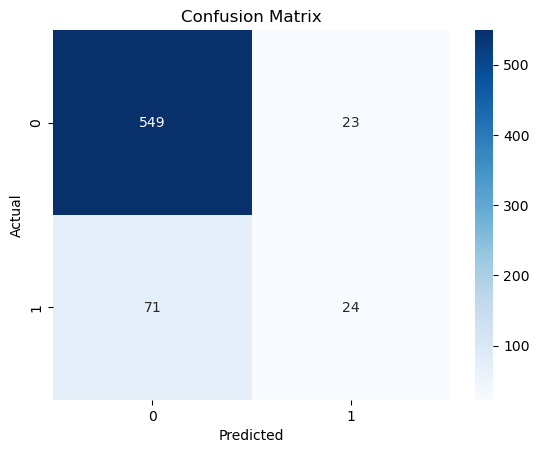

In [76]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

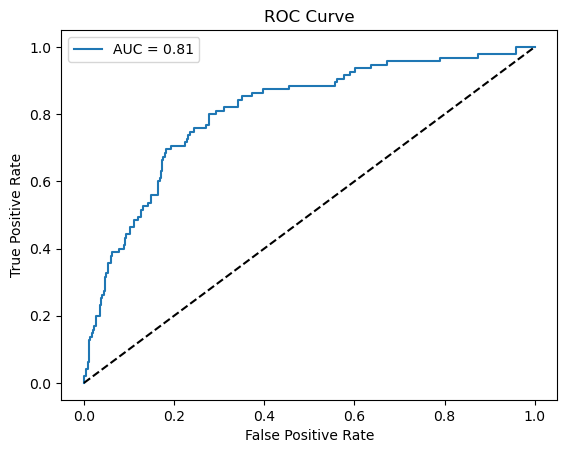

In [77]:
# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [78]:
# Model coefficients and odds ratios
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_[0]
})
coefficients['Odds_Ratio'] = np.exp(coefficients['Coefficient'])
print("\nCoefficients and Odds Ratios:\n", coefficients.sort_values(by='Odds_Ratio', ascending=False))


Coefficients and Odds Ratios:
                    Feature  Coefficient  Odds_Ratio
15  Customer service calls     0.711876    2.037810
66  International plan_Yes     0.682248    1.978321
2    Number vmail messages     0.433289    1.542321
5         Total day charge     0.357020    1.429065
3        Total day minutes     0.356844    1.428813
..                     ...          ...         ...
26                State_HI    -0.109935    0.895893
60                State_VA    -0.129066    0.878916
54                State_RI    -0.150432    0.860337
13        Total intl calls    -0.297275    0.742840
67     Voice mail plan_Yes    -0.836880    0.433060

[68 rows x 3 columns]
